In [1]:
##Finance Scraping: Google Finance API
###http://pandas-datareader.readthedocs.io/en/latest/remote_data.html#yahoo-finance

#setup tools
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

#Define the instruments to download
tickers = ['APPL', 'MSFT', 'SPY']

#Define online data source
data_source = 'google'

#Define data range
start_date = '2010-01-01'
end_date = '2016-12-31'

#Use pandas_reaser.data.DataReader to load data
panel_data = data.DataReader(tickers, data_source, start_date, end_date)

#Get just the adjusted closing prices. Returns pandas DataFrame
#The index in this DataFrame is the  major index of the panel_data
close = panel_data.loc['Close']
           
#get all weekdays from start to end date
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

#reindex close using all_weekdays as the new index to align the 
#existing prices in adj_close with our new dates
close = close.reindex(all_weekdays)
           
close.head(10)
#panel_data



/anaconda3/lib/python3.6/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


,APPL,MSFT,SPY
2010-01-01,NaN,NaN,NaN
2010-01-04,92.0,30.95,113.33
2010-01-05,92.0,30.96,113.63
2010-01-06,92.0,30.77,113.71
2010-01-07,92.0,30.45,114.19
2010-01-08,92.0,30.66,114.57
2010-01-11,92.0,30.27,114.73
2010-01-12,92.0,30.07,113.66
2010-01-13,92.0,30.35,114.62
2010-01-14,92.0,30.96,114.93


In [2]:
all_weekdays

DatetimeIndex(['2010-01-01', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', length=1826, freq='B')

In [3]:
close.describe()

,APPL,MSFT,SPY
count,20.000000,1761.000000,1761.000000
mean,118.866000,37.134015,164.704651
std,83.335363,10.812267,37.067717
min,92.000000,23.010000,102.200000
25%,92.000000,27.840000,131.210000
50%,92.000000,33.030000,165.310000
75%,92.000000,46.110000,201.990000
max,392.520000,63.620000,227.760000


In [4]:
#Get the MSFT timeseries. This now returns a 
#Pandas Series Object indexed by date.
msft = close.loc[:, 'MSFT']
#Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=100).mean()

In [5]:
#Plot everything in matplotlib!!
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(msft.index, msft, label='MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

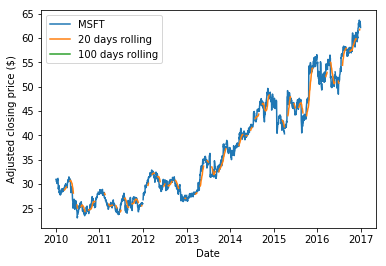

In [6]:
plt.show()

In [8]:
#Get the adjusted closing prices. The index in this DF is the major index of the panel_data.
adj_close = panel_data.loc['Adj Close']

#Getting all weekdays between start and end
all_weekdays = pd.date_range(start=start, end=end, freq='B')

#use reindex to align the prices with new st of dates
adj_close = adj_close.reindex(all_weekdays)

#Reindexing inserts missing value (NaN) for dates that weren't present
#now replace them with last available price
adj_close = adj_close.fillna(method='ffill')

all_weekdays

In [ ]:
#for morningstar API
from pandas_datareader import data
#import pandas_datareader.data as web
from datetime import datetime

tickers = ['AAPL', 'MSFT', 'SPY']

data_source = 'morningstar'
start = datetime(2000, 1, 1)
end = datetime(2017, 5, 24)
#f = data.DataReader(tickers, data_source, start, end)


#Use pandas_reader.data.DataReader to load data
panel_data = data.DataReader(tickers, data_source, start, end)

#Get just the adjusted closing prices. Returns pandas DataFrame
#The index in this DataFrame is the  major index of the panel_data
close = panel_data.loc[:,['Close']]
           
#get all weekdays from start to end date
all_weekdays = pd.date_range(start=start, end=end, freq='B')

#reindex close using all_weekdays as the new index to align the 
#existing prices in adj_close with our new dates
close = close.reindex(all_weekdays)
           
close.head(10)
#panel_data
